## 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
changingjob_df = pd.read_csv('changingjob_train.csv',index_col=0)
changingjob_df.drop('Unnamed: 0.1', axis=1,inplace=True)

In [ ]:
changingjob_df.head()

,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,30,NaN,Other,1,36,1
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,3.0,Pvt Ltd,>4,47,0
2,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,NaN,Other,never,83,0
3,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,30,3.0,Funded Startup,4,8,0
4,city_176,0.764,Other,Has relevent experience,Part time course,Graduate,STEM,11,NaN,Other,1,24,1


In [ ]:
changingjob_df.shape

(18126, 13)

In [ ]:
changingjob_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18126 entries, 0 to 18125
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    18126 non-null  object 
 1   city_development_Index  18126 non-null  float64
 2   gender                  18126 non-null  object 
 3   relevent_experience     18126 non-null  object 
 4   enrolled_university     18126 non-null  object 
 5   education_level         18126 non-null  object 
 6   major_discipline        15554 non-null  object 
 7   experience              18126 non-null  int64  
 8   company_size            12629 non-null  float64
 9   company_type            18126 non-null  object 
 10  last_new_job            18126 non-null  object 
 11  training_hours          18126 non-null  int64  
 12  target                  18126 non-null  int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 1.9+ MB


In [ ]:
changingjob_df.describe()

,city_development_Index,experience,company_size,training_hours,target
count,18126.000000,18126.000000,12629.000000,18126.000000,18126.000000
mean,0.829833,11.717533,4.258453,65.317941,0.247545
std,0.122993,9.544217,2.192552,60.010273,0.431598
min,0.448000,0.000000,1.000000,1.000000,0.000000
25%,0.743000,4.000000,3.000000,23.000000,0.000000
50%,0.910000,9.000000,4.000000,47.000000,0.000000
75%,0.920000,16.000000,6.000000,88.000000,0.000000
max,0.949000,30.000000,8.000000,336.000000,1.000000


In [ ]:
changingjob_df.isnull().sum()

city                         0
city_development_Index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2572
experience                   0
company_size              5497
company_type                 0
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [ ]:
changingjob_df['education_level'].value_counts(dropna=False)

Graduate    10962
Masters      4189
UH           2572
Phd           403
Name: education_level, dtype: int64

In [ ]:
changingjob_df['relevent_experience'].value_counts(dropna=False)

Has relevent experience    13135
No relevent experience      4991
Name: relevent_experience, dtype: int64

In [ ]:
changingjob_df['enrolled_university'].value_counts(dropna=False)

no_enrollment       13314
Full time course     3650
Part time course     1162
Name: enrolled_university, dtype: int64

In [ ]:
# UH(under highschool)인 사람들은 전공이 없으므로 NaN으로 처리되었다
changingjob_df['major_discipline'].value_counts(dropna=False)

STEM               13980
NaN                 2572
Humanities           650
Other                369
Business Degree      314
Arts                 241
Name: major_discipline, dtype: int64

In [ ]:
changingjob_df['company_size'].value_counts(dropna=False)

NaN    5497
3.0    2934
4.0    2465
8.0    1941
2.0    1405
6.0    1264
1.0    1245
5.0     837
7.0     538
Name: company_size, dtype: int64

In [ ]:
print(changingjob_df['city'].value_counts(dropna=False))
print(len(changingjob_df['city'].unique()))

city_103    4148
city_21     2533
city_16     1449
city_114    1270
city_160     816
            ... 
city_8         3
city_111       3
city_82        3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64
123


In [ ]:
changingjob_df['company_type'].value_counts(dropna=False)

Pvt Ltd                9373
Other                  5805
Funded Startup          973
Public Sector           911
Early Stage Startup     569
NGO                     495
Name: company_type, dtype: int64

In [ ]:
changingjob_df['last_new_job'].value_counts(dropna=False)

1        7642
>4       3139
2        2782
never    2244
4         985
3         964
0         370
Name: last_new_job, dtype: int64

### 데이터 전처리

### 결측치 처리

In [ ]:
#major_discipline이 없는 경우 UH로 치환한다
changingjob_df['major_discipline'].fillna('UH', inplace=True)

In [ ]:
#company_size는 결측치가 너무 많으므로 열을 삭제
changingjob_df.drop('company_size', axis=1, inplace=True)

In [ ]:
changingjob_df.shape

(18126, 12)

### 범주형 데이터 처리

In [ ]:
#각각의 변수의 특징들을 고려하여 범주형 데이터를 처리

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
#city
lb_city = LabelEncoder()
changingjob_df['city'] = lb_city.fit_transform(changingjob_df['city'])

In [ ]:
#gender
map_class = {'Female':0, 'Other':1, 'Male':2}
changingjob_df[['gender']] = changingjob_df[['gender']].applymap(map_class.get)

In [ ]:
lb_relevent_experience = LabelEncoder()
changingjob_df['relevent_experience'] = lb_relevent_experience.fit_transform(changingjob_df['relevent_experience'])

In [ ]:
#enrolled_university
map_class = {'no_enrollment':0, 'Part time course':1, 'Full time course':2}
changingjob_df[['enrolled_university']] = changingjob_df[['enrolled_university']].applymap(map_class.get)

In [ ]:
#education_level
map_class = {'UH':0, 'Graduate':1, 'Masters':2, 'Phd':3}
changingjob_df[['education_level']] = changingjob_df[['education_level']].applymap(map_class.get)

In [ ]:
#major_discipline
map_class = {'UH':0, 'Other':1, 'Arts':2, 'Humanities':3, 'Business Degree':4, 'STEM':5}
changingjob_df[['major_discipline']] = changingjob_df[['major_discipline']].applymap(map_class.get)

In [ ]:
#company_type
map_class = {'Other':0,'Early Stage Startup':1, 'Funded Startup':2, 'Pvt Ltd':3, 
            'NGO':4, 'Public Sector':5}
changingjob_df[['company_type']] = changingjob_df[['company_type']].applymap(map_class.get)

In [ ]:
#last_new_job
map_class = {'never':0, '0':1,'1':2,'2':3, '3':4, '4':5, '>4':6 }
changingjob_df[['last_new_job']] = changingjob_df[['last_new_job']].applymap(map_class.get)

In [ ]:
changingjob_df.isnull().sum()

city                      0
city_development_Index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [ ]:
changingjob_df

,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,5,0.920,2,0,0,1,5,30,0,2,36,1
1,77,0.776,2,1,0,1,5,15,3,6,47,0
2,64,0.624,1,1,2,1,5,5,0,0,83,0
3,50,0.767,2,0,0,2,5,30,2,5,8,0
4,57,0.764,1,0,1,1,5,11,0,2,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18121,5,0.920,0,1,0,3,5,17,4,5,16,0
18122,64,0.624,1,1,2,0,0,9,0,2,68,1
18123,5,0.920,2,0,0,2,5,30,3,6,110,0
18124,103,0.939,2,0,0,2,5,14,3,2,82,0


## 불균형 데이터 처리

In [ ]:
X = changingjob_df.drop('target', axis=1)
y = changingjob_df['target']
print(X.shape)
print(y.shape)
print('0의 개수', sum(y==0))
print('1의 개수', sum(y==1))

(18126, 11)
(18126,)
0의 개수 13639
1의 개수 4487


In [ ]:
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.combine import *

X_resampled, y_resampled = TomekLinks().fit_resample(X,y)
print(X_resampled.shape)
print(y_resampled.shape)
print('0의 개수', sum(y_resampled==0))
print('1의 개수', sum(y_resampled==1))

(16837, 11)
(16837,)
0의 개수 12350
1의 개수 4487


In [ ]:
changingjob_df = X_resampled.join(y_resampled)
changingjob_df

,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,5,0.920,2,0,0,1,5,30,0,2,36,1
1,77,0.776,2,1,0,1,5,15,3,6,47,0
2,64,0.624,1,1,2,1,5,5,0,0,83,0
3,50,0.767,2,0,0,2,5,30,2,5,8,0
4,57,0.764,1,0,1,1,5,11,0,2,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16832,5,0.920,0,1,0,3,5,17,4,5,16,0
16833,64,0.624,1,1,2,0,0,9,0,2,68,1
16834,5,0.920,2,0,0,2,5,30,3,6,110,0
16835,103,0.939,2,0,0,2,5,14,3,2,82,0


### 변수선정

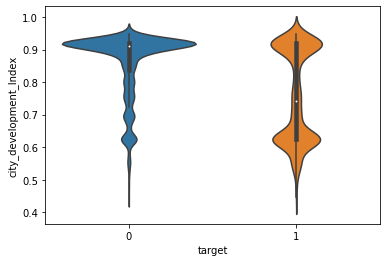

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(x='target', y='city_development_Index', data=changingjob_df)
plt.show()

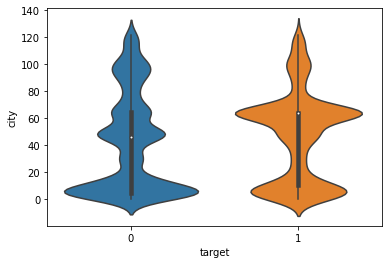

In [ ]:
sns.violinplot(x='target', y='city', data=changingjob_df)
plt.show()

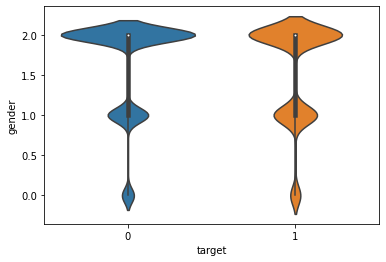

In [ ]:
sns.violinplot(x='target', y='gender', data=changingjob_df)
plt.show()

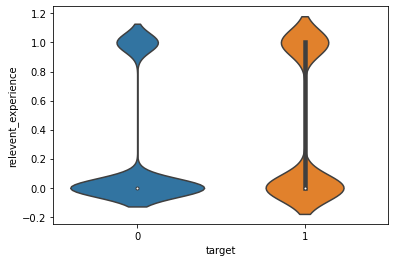

In [ ]:
sns.violinplot(x='target', y='relevent_experience', data=changingjob_df)
plt.show()

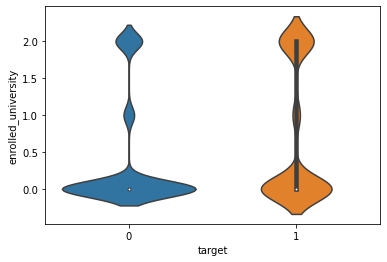

In [ ]:
sns.violinplot(x='target', y='enrolled_university', data=changingjob_df)
plt.show()

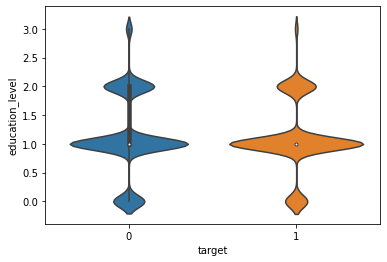

In [ ]:
sns.violinplot(x='target', y='education_level', data=changingjob_df)
plt.show()

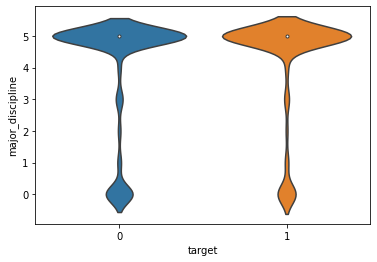

In [ ]:
sns.violinplot(x='target', y='major_discipline', data=changingjob_df)
plt.show()

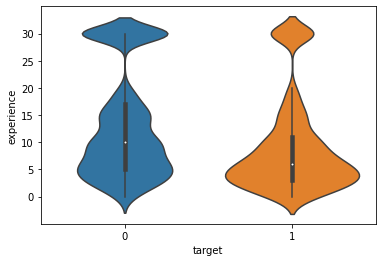

In [ ]:
sns.violinplot(x='target', y='experience', data=changingjob_df)
plt.show()

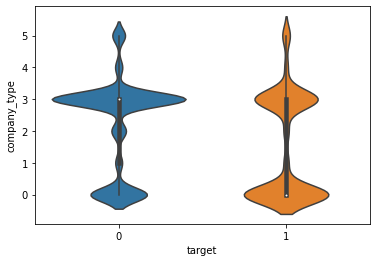

In [ ]:
sns.violinplot(x='target', y='company_type', data=changingjob_df)
plt.show()

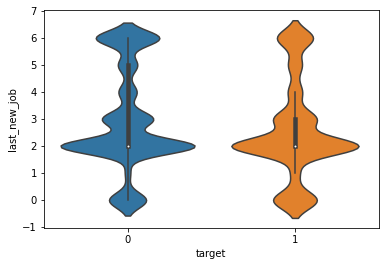

In [ ]:
sns.violinplot(x='target', y='last_new_job', data=changingjob_df)
plt.show()

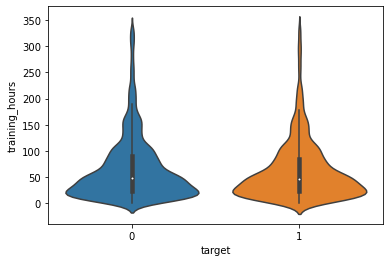

In [ ]:
sns.violinplot(x='target', y='training_hours', data=changingjob_df)
plt.show()

In [ ]:
changingjob_df.corr()['target'].sort_values()

city_development_Index   -0.368427
company_type             -0.220107
experience               -0.176218
last_new_job             -0.098968
gender                   -0.064572
education_level          -0.025231
training_hours           -0.024717
major_discipline          0.052873
city                      0.063196
relevent_experience       0.141036
enrolled_university       0.170870
target                    1.000000
Name: target, dtype: float64